In [26]:
import pandas as pd
import numpy as np 
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
pages_to_workers = pd.read_csv("https://raw.githubusercontent.com/ers6/ia_scanning_labor_data/main/csv_files/scans_and_workers_month_stats.csv")

In [3]:
pages_to_workers = pages_to_workers[['name', 'month_year', 'books_scanned', 'operator', 'pages_scanned', 'scans_to_workers', 'pages_to_workers']]

In [4]:
cebu = pages_to_workers.loc[pages_to_workers['name'] == 'Innodata Knowledge Services, Inc.'].reset_index()

In [13]:
# convert month year to numeric values --> from 'YYYY-MM' to YYYY + MM/12 

def month_year_to_numeric(month_year):
    year = int(month_year.split('-')[0])
    month = int(month_year.split('-')[1])/12
    return year + month
    

In [14]:
month_year_to_numeric(cebu.iloc[0]['month_year'])

2018.75

In [15]:
cebu.iloc[0]['month_year']

'2018-09'

In [18]:
def prep_center_df(center_df):
    center_df['date_numeric'] = ''
    for i in range(len(center_df)):
        center_df.at[i, 'date_numeric']= month_year_to_numeric(center_df.at[i, 'month_year'])
        
    return center_df
        
    

In [19]:
prep_center_df(cebu)

,index,name,month_year,books_scanned,operator,pages_scanned,scans_to_workers,pages_to_workers,date_numeric
0,1884,"Innodata Knowledge Services, Inc.",2018-09,224,9,38554.0,24.888889,4283.777778,2018.75
1,1885,"Innodata Knowledge Services, Inc.",2018-10,2895,26,637908.0,111.346154,24534.923077,2018.833333
2,1886,"Innodata Knowledge Services, Inc.",2018-11,4254,24,1129604.0,177.250000,47066.833333,2018.916667
3,1887,"Innodata Knowledge Services, Inc.",2018-12,8441,24,2212634.0,351.708333,92193.083333,2019.0
4,1888,"Innodata Knowledge Services, Inc.",2019-01,14400,26,3914552.0,553.846154,150559.692308,2019.083333
5,1889,"Innodata Knowledge Services, Inc.",2019-02,13217,27,3921995.0,489.518519,145259.074074,2019.166667
6,1890,"Innodata Knowledge Services, Inc.",2019-03,18197,31,5305760.0,587.000000,171153.548387,2019.25
7,1891,"Innodata Knowledge Services, Inc.",2019-04,16537,27,5348625.0,612.481481,198097.222222,2019.333333
8,1892,"Innodata Knowledge Services, Inc.",2019-05,21755,29,6758772.0,750.172414,233061.103448,2019.416667
9,1893,"Innodata Knowledge Services, Inc.",2019-06,25172,29,7462584.0,868.000000,257330.482759,2019.5


In [28]:
from sklearn.linear_model import LinearRegression
X = np.array([[1, 1], [1, 15], [2, 2], [2, 7]])
 # y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3
reg = LinearRegression().fit(X, y)
reg.score(X, y)

reg.

LinearRegression()

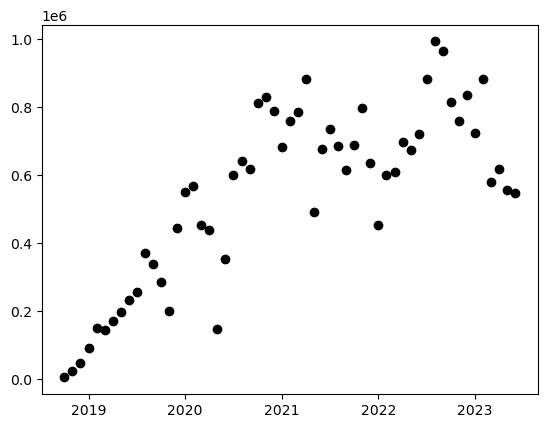

In [57]:
import matplotlib.pyplot as plt
# set date numeric to X
# pages to workers ratio to Y

x = cebu['date_numeric'].to_numpy(dtype=float).reshape(-1, 1)

y = cebu['pages_to_workers'].to_numpy(dtype=float).reshape(-1, 1)

reg = LinearRegression().fit(x, y)




plt.scatter(x, y, color="black")
# plt.plot(reg.predict(x), reg.predict(y), color="blue", linewidth=3)


In [39]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)



# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}